In [1]:
import random
from qiskit import execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *

In [2]:
def key_basis_generation(num_qubits, p):
    random.seed(p)
    key = str('{0:008b}'.format(random.getrandbits(num_qubits)))
    bases = str('{0:008b}'.format(random.getrandbits(num_qubits)))
    return key, bases

def gen_q(circuit, k, b):
    for i in range(len(k)):
        if k[i] == '0' and b[i] == '1':
            circuit.h(i)
        elif k[i] == '1' and b[i] == '0':
            circuit.x(i)
        elif k[i] == '1' and b[i] == '1':
            circuit.x(i)
            circuit.h(i)
    return circuit 

def bob_measurement(circuit, bob):
    for i in range(len(bob)):
        if bob[i] == '0':
            circuit.measure(i,i)
        else:
            circuit.h(i)
            circuit.measure(i,i)
    return circuit

def bob_measures_the_qubit(circ):
    # Use Aer's qasm_simulator
    
    backend_sim = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1, which is the default.
    job_sim = execute(circ, backend_sim, shots=1)

    # Grab the results from the job.
    result_sim = job_sim.result()
    counts = result_sim.get_counts(circ)
    output = list(counts.keys())[0] 
           
    return output

def bob_genrates_key(a_b, b_b, output):
    key = ''
    for i in range(len(b_b)):
        if a_b[i] == b_b[i]:
            key+=str(output[i])            
    return key

In [3]:
def gen_q(circuit, k, b):
    for i in range(len(k)):
        if k[i] == '0' and b[i] == '1':
            circuit.h(i)
        elif k[i] == '1' and b[i] == '0':
            circuit.x(i)
        elif k[i] == '1' and b[i] == '1':
            circuit.x(i)
            circuit.h(i)
    return circuit 

In [4]:
def bob_measurement(circuit, bob):
    for i in range(len(bob)):
        if bob[i] == '0':
            circuit.measure(i,i)
        else:
            circuit.h(i)
            circuit.measure(i,i)
    return circuit

In [5]:
def bob_measures_the_qubit(circ):
    # Use Aer's qasm_simulator
    
    backend_sim = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1, which is the default.
    job_sim = execute(circ, backend_sim, shots=1)

    # Grab the results from the job.
    result_sim = job_sim.result()
    counts = result_sim.get_counts(circ)
    output = list(counts.keys())[0] 
           
    return output


In [6]:
def bob_genrates_key(a_b, b_b, output):
    key = ''
    for i in range(len(b_b)):
        if a_b[i] == b_b[i]:
            key+=str(output[i])            
    return key

In [7]:
circuit = QuantumCircuit(8,8)

In [8]:
# Alice generates her encoded key and basis

Alice_en_key, Alice_basis = key_basis_generation(8,1020)

print('Alice\'s Key bits: ', Alice_en_key)
print('Alice\'s Basis bits: ', Alice_basis)


Alice's Key bits:  00011100
Alice's Basis bits:  00000110


In [9]:
# Bob does generates the basis

Truncate, Bob_basis = key_basis_generation(8, 200)

print('Bob\'s Key bits: ', Bob_basis)

Bob's Key bits:  11100110


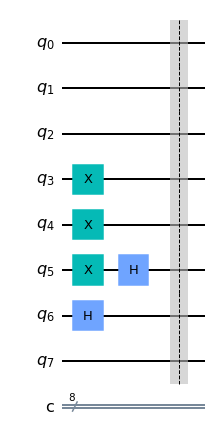

In [10]:
# Alice creates quantum circuit according to her key & basis
circuit = gen_q(circuit, Alice_en_key, Alice_basis)
circuit.barrier()
circuit.draw('mpl')

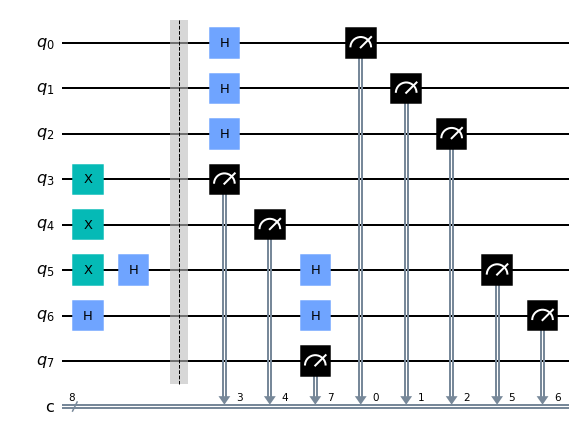

In [11]:
# Bob creates measurement setting for the qubit according to his basis

circuit = bob_measurement(circuit, Bob_basis)

circuit.draw('mpl')

In [12]:
# Bob recieves the qubits from Alice and performs measurement 
output = bob_measures_the_qubit(circuit)
print(output)

00111001


In [13]:
# Bob compares the output with Alice's basis and generates the key
key = bob_genrates_key(Alice_basis, Bob_basis, output)
print(key)

11001


In [14]:
#Bob recieved an encoded message or cipher text from Alice
c = ["01001001", "01010000"]
decrypted = ""
# padding key string
key = key.rjust(len(c[0]), "0")
for k in range(len(c)):
    n = int(len(c[k])/len(key))
    j = 0
    for i in c[k]:
        p = int(i)^int(key[j])
        decrypted += str(p) 
        j+=1
        if len(key) == j:
            j=0
    decrypted += ' '
print('Decrypted bits: ', decrypted)

Decrypted bits:  01010000 01001001 


In [15]:
# Converting the bit string to a text

binary_values = decrypted.split()

ascii_string = ""

for binary_value in binary_values:

    an_integer = int(binary_value, 2)
    ascii_character = chr(an_integer)
    ascii_string += ascii_character

print('The message: ', ascii_string)

The message:  PI
